# Machine Learning

## Program Exercise # 1: Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#warmup
N=5
A=np.eye(N)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Linear Regression with One Variable
For this data suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain has trucks in various cities for opening a new outlet. You have data for profits and populations from the cities

In [3]:
colum=['Population of city in 10000s', 'Profit in $10000s']
df=pd.read_csv('Desktop\ex1data1.txt', header=None, names=colum)
df.head()

,Population of city in 10000s,Profit in $10000s
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population of city in 10000s,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
Profit in $10000s,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


Before starting any task, it is often useful to understand the data by visualizing it

In [5]:
import seaborn as sns

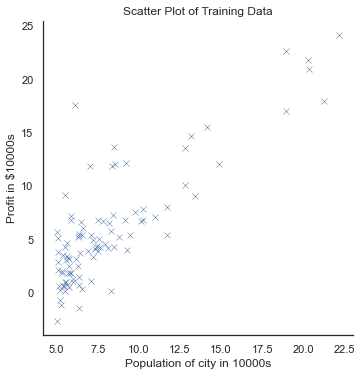

In [6]:
# Apply the default theme
sns.set_theme(style='white')
# Create a visualization
figure=sns.relplot(data=df, x=df.columns[0], y=df.columns[1], marker='x',palette=('bright'))
figure.set(title='Scatter Plot of Training Data')
pass

In [7]:
#Add a column of ones to df
df.insert(0,'theta_0',np.ones((len(df.index))))
#initialize fitting parameter
x=df.iloc[:,[0,1]].values
y=df.iloc[:,[2]].values
theta = np.zeros((2,1)) 
iterations = 1500
alpha = 0.01

In [8]:
df.head()

,theta_0,Population of city in 10000s,Profit in $10000s
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233


### Computing the Cost J($\theta$)

We can measure accuracy of our hypothesis function by using a **cost function**
this is also called "Squared error function or Mean squared error"

Implement a function to calculate J$(\theta)$ so you can check the convergence of your gradient descent implementation

The objective of linear regression is to minimize the cost function
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^{2}.$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$h_\theta(x)=\theta^{T}x=\theta_0+\theta_1x_1$$

In [9]:
def computeCost(X,y,theta):
    '''
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    '''
    #numer of trainig examples
    m=len(y)
    J=(1/(2*m))*np.sum(np.power(((np.dot(X,theta))-y),2))
    return J

Testing the Cost function

In [10]:
J=computeCost(x,y,theta)
print('With theta = [0,0] \nCost computed = ',round(J,4))

With theta = [0,0] 
Cost computed =  32.0727


In [11]:
theta=[[-1] ,[ 2]]
J = computeCost(x, y, theta)
print('With theta =', str(theta) ,'\nCost computed = ',round(J,4))

With theta = [[-1], [2]] 
Cost computed =  54.2425


### Gradient Descent for Linear Regression with One Variable 

Recall that the parameters of your model are the $\theta$ values. These values you will adjust to minimize cost J$(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update 
The objective of linear regression is to minimize the cost function

$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}.$$

Simultaneously update $\theta_j$ for all j, j=0 and j=1

In [12]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    '''
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        theta[0]-=((alpha/m)*np.sum(np.multiply((np.dot(X,theta)-y),(X[:,[0]]))))
        theta[1]-=((alpha/m)*np.sum(np.multiply((np.dot(X,theta)-y),(X[:,[1]]))))
        J_history[i]=computeCost(X,y,theta)
    return theta

In [13]:
theta = gradientDescent(x, y, theta, alpha, iterations)
theta

[array([-3.71382338]), array([1.17478693])]

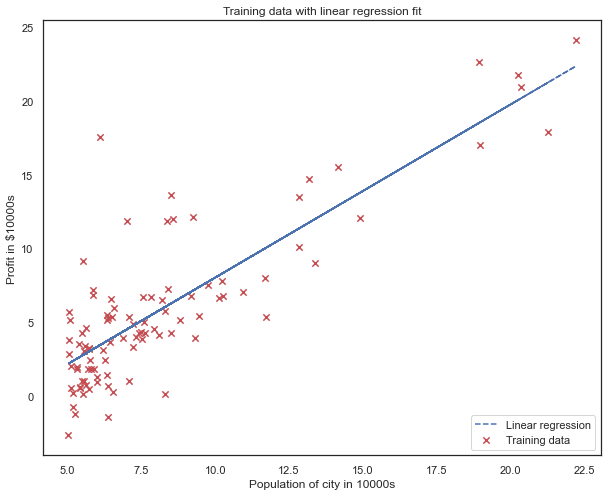

In [14]:
plt.figure('Training data with linear regression fit',figsize=(10,8))
plt.scatter(data=df, x=df.columns[1], y=df.columns[2], marker='x', color='r',s=40,label='Training data')
plt.plot(x[:,1],np.dot(x,theta),'b--',label='Linear regression')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.legend(loc= 'lower right')
plt.title('Training data with linear regression fit')
pass

The final values for $\theta$ will also be used to make predictions on profits in areas of 35000 and 70000 people

### Predict values for population sizes of 35,000 and 70,000

In [15]:
predict1 = np.dot([1, 3.5],theta)
predict2 = np.dot([1, 7], theta)
print('For population = 35,000, we predict a profit of', str(predict1*10000))
print('For population = 70,000, we predict a profit of', str(predict2*10000))

For population = 35,000, we predict a profit of [3979.30870199]
For population = 70,000, we predict a profit of [45096.85121518]


## Visualizing J($\theta_0$), J($\theta_1$) 

A contour plot is a graph that contains many contour lines. A contour line of two variable function has a constant value at all points of the same line

The purpose of these graphs is to show you how J$(\theta)$ varies with changes in $\theta_0$ and $\theta_1$

In [16]:
from matplotlib import cm

In [17]:
#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

#initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))


#Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [[theta0_vals[i]], [theta1_vals[j]]]
        J_vals[i,j] = computeCost(x, y, t)
        
#Because of the way meshgrids work in the surf command, we need to
#transpose J_vals before calling surf, or else the axes will be flipped
J_vals = np.transpose(J_vals)


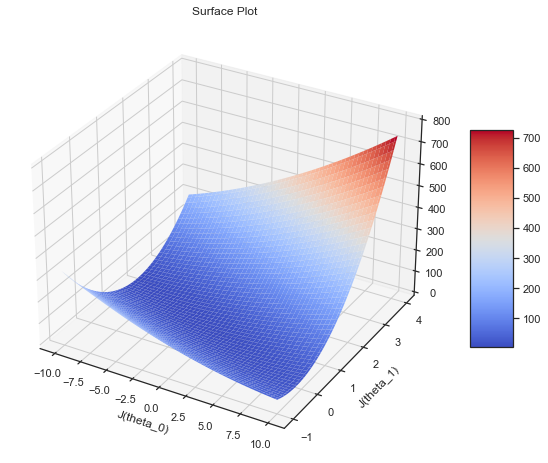

In [18]:
#fig, ax= plt.subplots(subplot_kw={"proyection":"3d"})
fig=plt.figure('Projection',figsize=(10,8))
ax=plt.axes(projection='3d')
X,Y=np.meshgrid(theta0_vals,theta1_vals)
surf = ax.plot_surface(X,Y,J_vals,cmap=cm.coolwarm, linewidth=0,edgecolor='None')
ax.set_zlim(0,800)
ax.set_xlabel("J(theta_0)")
ax.set_ylabel("J(theta_1)")
ax.set_title('Surface Plot')

#Add acolor bar which maps values to colors
fig.colorbar(surf,shrink=0.5, aspect=5)

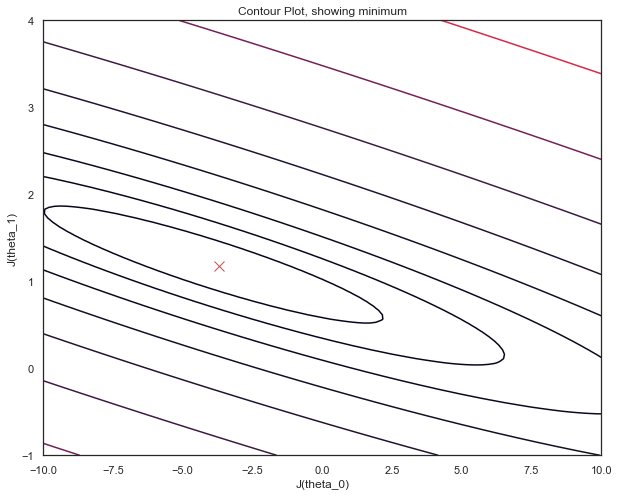

In [19]:
fig2=plt.figure('Contour Plot',figsize=(10,8))
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2,3,20))
plt.plot(theta[0], theta[1], 'rx', ms=10, lw=2) #minimum
#The minimum us the optimal point for theta_0 and theta_1, and each step 
#of gradient descent moves closer to this point
plt.title('Contour Plot, showing minimum')
plt.xlabel("J(theta_0)")
plt.ylabel("J(theta_1)")
pass

-----------------------------------------------------------------------------
# Linear Regression with Multiple Variables

The multivariable form of the hypothesis function accommodating these multiple features is as follows:

$$h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+ ... +\theta_nx_n $$

Using the definition of matrix multiplication, our multivariable hypothesis function be represented as:

$$h_\theta(x)=\theta^{T}x$$



Implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. The data contain a training set of housing prices in Portland, Oregon.

In [20]:
colum=['Size of the house (ft2)','Number of bedrooms','Price of the house']
df=pd.read_csv('Desktop\ex1data2.txt', header=None, names=colum)
df.head()

,Size of the house (ft2),Number of bedrooms,Price of the house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size of the house (ft2),47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
Number of bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
Price of the house,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


### Feature Normalization
Make sure features are on a similar scale

By looking at the values from this dataset, note tha the house size are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

To perform feature normalization:
- Substract the mean value of each feature from the dataset.
- After substracting the mean, additionally scale (divide) the features values by their respective "standard deviations". Standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within +-2 standard deviations of the mean).

In [22]:
def featureNormalize(X):
    X_norm=np.zeros((len(df.index),len(df.columns)-1))
    mu = np.mean(X).values
    sigma = np.std(X).values
    for i in range(len(df.columns)-1):
        X_norm[:,i]=(X.iloc[:,i].values-mu[i])/sigma[i]
    return X_norm 

In [23]:
X=featureNormalize(df)
colum=['Size of the house (ft2)','Number of bedrooms']#,'Price of the house'
df_norm=pd.DataFrame(X, columns=colum)
df_norm.head()

,Size of the house (ft2),Number of bedrooms
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


In [24]:
#Add intercept term to df_norm
df_norm.insert(0,'theta_0',np.ones((len(df.index))))
df_norm.head()

,theta_0,Size of the house (ft2),Number of bedrooms
0,1.0,0.131415,-0.226093
1,1.0,-0.509641,-0.226093
2,1.0,0.507909,-0.226093
3,1.0,-0.743677,-1.554392
4,1.0,1.271071,1.102205


### Cost Function and Gradient Descent for Linear Regression with Multiple Variables 

In the multivariable case, the cost function can also be written in the following vectorized form:

$$J(\theta)=\frac{1}{2m}(X\theta-y)^{T}(X\theta-y)$$

where X is a matrix, $\theta$ and y are column vectors

In [25]:
def computeCostMulti(X, y, theta):
    '''
    COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
    J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    
    '''
    m=len(y) # number of training examples
    J=(1/(2*m))*np.dot(np.reshape((np.dot(X,theta)-y),-1),(np.dot(X,theta)-y))
    return J

In [26]:
theta = np.zeros((3,1))
x=df_norm.iloc[:,[0,1,2]].values #add a column of ones to x
y=df.iloc[:,[2]].values
J=computeCostMulti(x,y,theta)
J

array([6.55915481e+10])

In [27]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    '''
    GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    
    '''
    m=len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        theta -= (alpha/m)*np.reshape(np.dot(np.reshape(np.dot(X,theta)-y,-1),X),(len(theta),1))
        J_history[i]=computeCostMulti(X,y,theta)
    return theta , J_history

In [28]:
alpha=0.1 # 0.01
num_iters = 50 # 400
theta = np.zeros((3,1))
theta,J_history = gradientDescentMulti(x, y, theta, alpha, num_iters)

In [29]:
print('Theta computed from gradient descent:\n',str(theta))

Theta computed from gradient descent:
 [[338658.2492493 ]
 [103322.82942954]
 [  -474.74249522]]


Estimate the price of a 1650 ft^2, 3 bedrooms house

In [30]:
price = theta[0]+theta[1]*((1650-2000.7)/794.7024)+theta[2]*((3-3.2)/0.7610)
print('Predicted price of a 1650 sq-ft, 3 br house using Gradient descent:\n',str(price))

Predicted price of a 1650 sq-ft, 3 br house using Gradient descent:
 [293186.93470615]


### Plot the Convergence Graph
Convergence of gradient descent with an appropiate learning rate $(\alpha)$

- if $\alpha$ is too small: slow convergence
- if $\alpha$ is too large: $J(\theta)$ may not decrese on every iteration; may not converge, or Slow convergence is also possible

Recomendations: Try values of $\alpha$ on a log scale, at multiplicative steps of about 3 times the previous values (i.e., 0.3, 0.1, 0.03, 0.01 and so on).

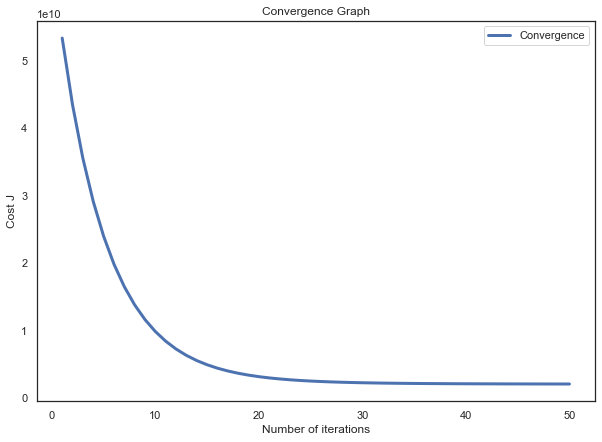

In [31]:
plt.figure('Graph', figsize=(10,7))
x=np.arange(1,len(J_history)+1)
y=np.reshape(J_history,-1)
plt.plot(x,y,'b-', label='Convergence',linewidth=3)
plt.title('Convergence Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend(loc='best')

## Normal Equation

Gradient descent gives one way of minimizing J. A second way of doing this, with out an iterative algorithm to perform the minimization, is the normal equation method. Method to solve for $\theta$ analytically

$$\theta=(X^{T}X)^{-1}X^{T}y$$

Using this formula does not require any feature scaling or choose $\alpha$, and you will get an exact solution in one calculation, there is no "loop until convergence" like gradient descent.

There are some problems with:
- n very large (n= number of features) n>10000
- if $X^{T}X$ is non - invertable (singular or degenerate), common causes:
    - redundant features, two features are very closely realed
    - too many features (e.g. m<=n), in this case delete some features or use regularization

In [32]:
colum=['Size of the house (ft2)','Number of bedrooms','Price of the house']
df=pd.read_csv('Desktop\ex1data2.txt', header=None, names=colum)
df.head()

,Size of the house (ft2),Number of bedrooms,Price of the house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [33]:
def normalEqn(X, y):
    '''
    NORMALEQN Computes the closed-form solution to linear regression 
    NORMALEQN(X,y) computes the closed-form solution to linear 
    regression using the normal equations.
    '''
    #theta = np.zeros(len(df.columns), 1)
    theta=np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),np.reshape(y,(len(df.index),1))))
    return theta

In [34]:
df.insert(0,'theta_0',np.ones((len(df.index))))
x=df.iloc[:,[0,1,2]].values#add a column of ones to x
y=df.iloc[:,[3]].values
theta = normalEqn(x,y)
print('Theta computed from gradient descent:\n',str(theta))

Theta computed from gradient descent:
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


Predicted price of 1650 ft^2, 3 bedrooms house using normal equation:

In [35]:
price2 = theta[0]+theta[1]*1650+theta[2]*3
print('Predicted price of a 1650 sq-ft, 3 br house using Normal equation:\n',str(price2))

Predicted price of a 1650 sq-ft, 3 br house using Normal equation:
 [293081.46433489]


In [36]:
print('Predict price using the model fit with gradient descent:\n',str(price))
print('Predict price using the model fit with normal equation:\n',str(price2))

Predict price using the model fit with gradient descent:
 [293186.93470615]
Predict price using the model fit with normal equation:
 [293081.46433489]


-----------------------------------------------------------------------------